#EXERCISE-CLUSTERING

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
#print(data)
#print('target names', data.target_names)
#print('target values', data.target)
#print('target names', data.feature_names)
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['target'] = data['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Preprocessing:
use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) 

In [ ]:
#df1=df.loc[df['target'] == 1]
#print(df1)
from sklearn.preprocessing import StandardScaler
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
#print(x)

PCA (principal component analysis)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head()                                                                # we use this dataset (without the target feature) for clustering

,principal component 1,principal component 2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


In [ ]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


plot PCA

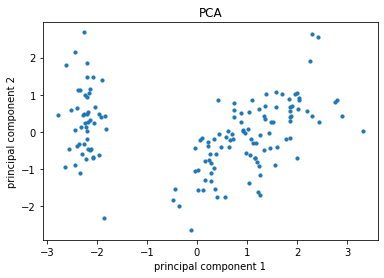

In [ ]:
plt.scatter(finalDf['principal component 1'], finalDf['principal component 2'], s=10)
plt.title('PCA')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

#KMeans-3 clusters

In [ ]:
from sklearn.cluster import KMeans

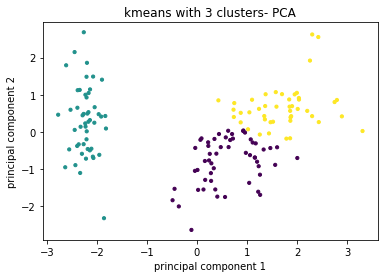

In [ ]:
kmeans=KMeans(n_clusters=3).fit(principalDf)

#get clusters centroids
centroids=kmeans.cluster_centers_
#print(kmeans.cluster_centers_)

#plot the clustering results and the cluster centers
pred = kmeans.predict(principalDf)

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c=pred, s=10)
plt.title('kmeans with 3 clusters- PCA')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
#plt.scatter(centroids[:,0], centroids[:,1], s=20, c='red')
plt.show()

#Kmeans for different k values

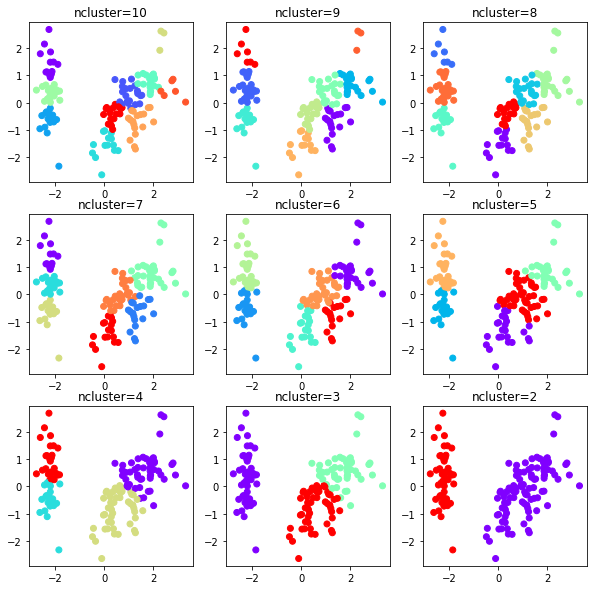

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
sse=[]
fig, axs = plt.subplots(3, 3, figsize=(10,10))
for i in range(3):
       for j in range(3):
              k = 10 - (i*3+j)
              km =  KMeans(n_clusters = k)
              axs[i, j].scatter(principalDf['principal component 1'], principalDf['principal component 2'], c = km.fit_predict(principalDf), cmap ='rainbow')
              axs[i, j].set_title('ncluster='+ str(k))
              silhouette_scores.append(silhouette_score(principalDf, km.fit_predict(principalDf)))
              sse.append(km.inertia_) 


#### INTERNAL VALIDATION: SILHOUETTE COEFFICIENT

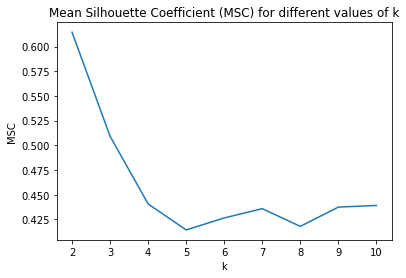

In [ ]:
#print(silhouette_scores)
#silhouette_scores.reverse()

reversed_list = silhouette_scores[::-1]

plt.plot(range(2,11), reversed_list)
plt.xlabel('k')
plt.ylabel('MSC')
plt.title('Mean Silhouette Coefficient (MSC) for different values of k')
plt.show()

#### INTERNAL VALIDATION: SUM OF SQUARE

[28.539967290793342, 32.47845447173694, 39.93799678064015, 47.974804890726276, 56.85338905172847, 66.1875835409368, 89.36805047698056, 115.02075663594013, 197.403816045413]


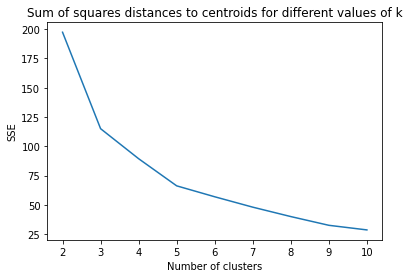

In [ ]:
print(sse)
reversed_sse = sse[::-1]

plt.plot(range(2,11), reversed_sse)
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title('Sum of squares distances to centroids for different values of k')
plt.show()

# Delete one of the classes and repeat kmean



In [ ]:
df.drop(df[df['target'] == 1].index, inplace = True)                             #in this case I removed the setosa class, the analysis is more complex because of the partial superposition of the virginica and versicolor class
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

In [ ]:

features1 = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
# Separating out the features
x1 = df.loc[:, features1].values
# Separating out the target
y1 = df.loc[:,['target']].values
# Standardizing the features
x1 = StandardScaler().fit_transform(x1)
#print(x)

In [ ]:
pca1 = PCA(n_components=2)
principalComponents1 = pca1.fit_transform(x1)
principalDf1 = pd.DataFrame(data = principalComponents1
             , columns = ['principal component 1', 'principal component 2'])
principalDf1.head()  

,principal component 1,principal component 2
0,-1.754961,-0.211935
1,-1.485435,0.969455
2,-1.774531,0.617818
3,-1.699099,0.872568
4,-1.885876,-0.389434


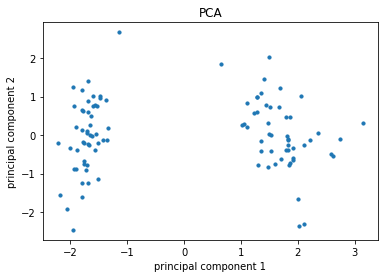

In [ ]:
plt.scatter(principalDf1['principal component 1'], principalDf1['principal component 2'], s=10)
plt.title('PCA')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

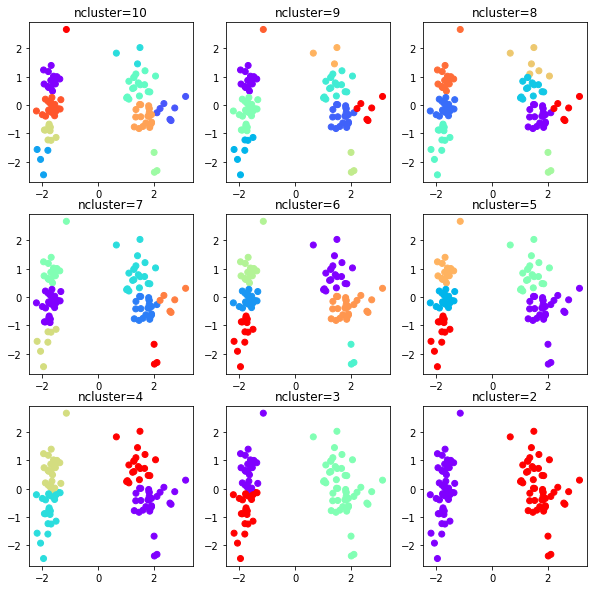

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores1 = []
#sse=[]
fig, axs = plt.subplots(3, 3, figsize=(10,10))
for i in range(3):
       for j in range(3):
              k = 10 - (i*3+j)
              km =  KMeans(n_clusters = k)
              axs[i, j].scatter(principalDf1['principal component 1'], principalDf1['principal component 2'], c = km.fit_predict(principalDf1), cmap ='rainbow')
              axs[i, j].set_title('ncluster='+ str(k))
              silhouette_scores1.append(silhouette_score(principalDf1, km.fit_predict(principalDf1)))
              #sse.append(km.inertia_) 


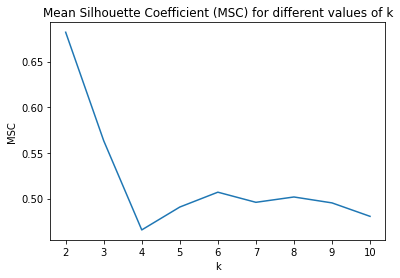

In [ ]:
#print(silhouette_scores)
#silhouette_scores.reverse()

reversed_list1 = silhouette_scores1[::-1]

plt.plot(range(2,11), reversed_list1)
plt.xlabel('k')
plt.ylabel('MSC')
plt.title('Mean Silhouette Coefficient (MSC) for different values of k')
plt.show()

#LOO & Support Vector Machine classification 

In [ ]:
# Importing the necessary Python libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut
#LeaveOneOut() is equivalent to KFold(n_splits=n) and LeavePOut(p=1) where n is the number of samples.
from sklearn import svm
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
data = load_iris()
#print(data)
df_svm = pd.DataFrame(data['data'], columns=data['feature_names'])
df_svm['target'] = data['target']

df_svm.drop(df_svm[df_svm['target'] == 0].index, inplace = True)
#print('il target 0 è stato eliminato')

x_svm = df_svm[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y_svm = df_svm['target']

#print(y_data)
#print(x_data)
#X = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
#y = pd.DataFrame(data = iris['target'], columns = ['target'])



In [ ]:
#kf = KFold(n_splits=100)
#print(kf)
#oppure in maniera equilavente
kf = LeaveOneOut()

In [ ]:
import statistics
V_accuracy_vec = []
T_accuracy_vec = []
# Iterating through each of the folds in K-Fold
for train_index, val_index in kf.split(x_svm):  

# Splitting the training set from the validation set for this specific fold
    X_train, X_val = x_svm.iloc[train_index, :], x_svm.iloc[val_index, :]
    y_train, y_val = y_svm.iloc[train_index], y_svm.iloc[val_index]
    
    # Fitting the X_train and y_train datasets to the SVC model
    clf = svm.SVC(kernel='linear', C=1).fit(X_train,y_train)
    #print('validation accuracy:', clf.score(X_val,y_val))
    #print('training accuracy:', clf.score(X_train,y_train))
    V_accuracy_vec.append(clf.score(X_val,y_val))
    T_accuracy_vec.append(clf.score(X_train,y_train))
    # Getting inferential predictions for the validation dataset
    #val_preds = rfc_model.predict(X_val)
    
    # Generating validation metrics by comparing the inferential predictions (val_preds) to the actuals (y_val)
    #val_accuracy = accuracy_score(y_val, val_preds)
    #val_confusion_matrix = confusion_matrix(y_val, val_preds)
    
    # Printing out the validation metrics
    #print(f'Accuracy Score: {val_accuracy}')
    #print(f'Confusion Matrix: \n{val_confusion_matrix}')

#print('validation accuracy vector', V_accuracy_vec)

v = statistics.mean(V_accuracy_vec)
t = statistics.mean(T_accuracy_vec)
print('VALIDATION MEAN ACCURACY:', v)
print('TRAINING MEAN ACCURACY:', t)
print('Empirical error (1-val_acc):', 1-v)
print('Generalization error (1-train_acc):', 1-t)

VALIDATION MEAN ACCURACY: 0.97
TRAINING MEAN ACCURACY: 0.9883838383838385
Empirical error (1-val_acc): 0.030000000000000027
Generalization error (1-train_acc): 0.011616161616161524
